# Temporal Networks v1.0 #

In [1]:
import sys
sys.path.append("/home/genois/Bureau/tempnet/")
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

In [2]:
import tempnet.utils as tnu
import tempnet.measures as tnm
import tempnet.randomisations as tnr

## Timeline shuffling - instant-events ##
We here present randomization techniques which shuffle the timelines of contact of links in the static network, for instant-events temporal networks. All functions take a `link_timeline()` object as input, and return a `link_timeline()` object.

### Events permutation $\text{P}[\mathcal{L}]$: `P__L(lks_data,t_i,t_f,dt)` ###
This function randomly permutates the time stamps of events between `t_i` and `t_f` and among all timelines of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

**Note:** This function returns a `tij()` object.

In [4]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_tij = tnr.P__L(lks_data,0,60480,1)
new_lks = tnu.tijtau_to_link_timeline(tnu.tij_to_tijtau(new_tij,1))

Test of the preservation of the total number of events:

In [5]:
nC0 = sum(tnm.weights(lks_data).values())
nC1 = sum(tnm.weights(new_lks).values())
nC0 == nC1

True

Test of the modification of the activity timeline:

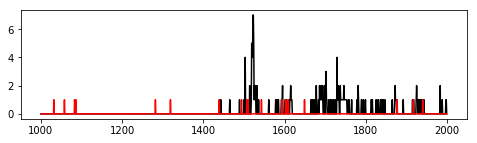

In [6]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Events permutation with weigths preservation $\text{P}[\mathbf{w}]$: `P__w(lks_data,t_i,t_f,dt)` ###
This function randomly assigns time stamps of $w$ events between `t_i` and `t_f` for every timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

**Note:** This function returns a `tij()` object.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_tij = tnr.P__w(lks_data,0,60480,1)
new_lks = tnu.tijtau_to_link_timeline(tnu.tij_to_tijtau(new_tij,1))

Test of the preservation of the weights:

In [4]:
w0 = tnm.weights(lks_data)
w1 = tnm.weights(new_lks)
Test = np.array([w0[lk] == w1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the modification of the activity timeline:

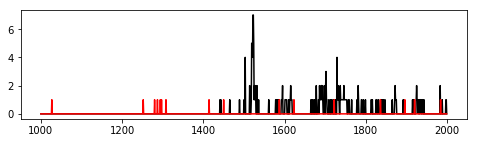

In [5]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Events permutation with weigths, initial time and final time preservation $\text{P}[\mathbf{w},\mathbf{t}^1,\mathbf{t}^w]$: `P__w_t1_tw(lks_data,t_i,t_f,dt)` ###
This function randomly assigns time stamps of $w$ events between `t1` and `tw` for every timeline of a `link_timeline()` object `lks_data`. The initial time step `t_i`, final time step `t_f` and time step duration `dt` are required.

**Note:** This function returns a `tij()` object.

In [3]:
lks_data = tnu.read_link_timeline("/home/genois/Bureau/tempnet/lks_InVS13.dat")
new_tij = tnr.P__w_t1_tw(lks_data,0,60480,1)
new_lks = tnu.tijtau_to_link_timeline(tnu.tij_to_tijtau(new_tij,1))

Test of the preservation of the weights:

In [4]:
w0 = tnm.weights(lks_data)
w1 = tnm.weights(new_lks)
Test = np.array([w0[lk] == w1[lk] for lk in lks_data.links()])
Test.all()

True

Test of the modification of the activity timeline:

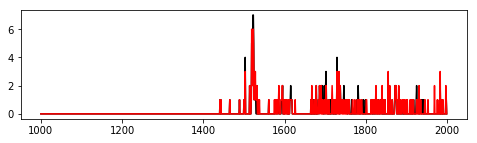

In [5]:
TL0 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(lks_data,1,0,60480))
TL1 = tnm.activity_timeline(tnu.link_timeline_to_snapshot_sequence(new_lks,1,0,60480))

tmin = 1000
tmax = 2000

fig = plt.figure(figsize=(8,2))
x = range(len(TL0))[tmin:tmax]
plt.plot(x,TL0[tmin:tmax],'k-')
plt.plot(x,TL1[tmin:tmax],'r-')
plt.show()

### Permutation of intercontacts within timelines $\text{P}[\pi_\mathcal{L}(\Delta \tau)]$, $\text{P}[\pi_\mathcal{L}(\Delta \tau),\mathbf{t}_1]$: ###
These shufflings randomly permutate the intercontacts within each timeline of a `link_timeline()` object `lks_data`. For instant-events temporal networks, all contact durations are set to the time-step `dt`. For such shufflings, simply use the functions `P__pitau_pidtau(lks_data,t_i,t_f,dt)` and `P__pitau_pidtau_t1(lks_data,t_i,t_f,dt)` described in the next chapter with a `link_timeline()` object that contains an instant-events temporal network.